In [1]:
# Install the latest bio-compose from PyPI:

# !pip install -q bio-compose

In [2]:
# Import the simulation verifier:

import sys 
import os 
sys.path.insert(0, '..')

from bio_compose.verifier import Verifier

In [3]:
# Define sbml verification submission (query) parameters (Uniform Time Course):

# model parameters
sbml_fp = '../tests/fixtures/sbml-core/BIOMD0000000001_url.xml'
simulators = ['amici', 'copasi', 'tellurium']

# "time" parameters
start_time = 0  # 'start'
end_time = 10  # 'end'
n_steps = 100  # 'steps'

# comparison parameters 
rtol = 1e-05  # if this parameter is omitted from the submission, its default value is 1e-4
atol=1e-08  # here we are using the defaults used by np.allclose as an example of custom tolerances. Otherwise, max(1e-3, max1 * 1e-5, max2 * 1e-5) where max1 is the max() of the given piecewise arrays.

In [4]:
# instantiate a new Verifier:

verifier = Verifier()

In [10]:
# use the Verifier instance to submit a new simulation verification to the server using aforementioned query parameters:

submission = verifier.verify_sbml(
    entrypoint=sbml_fp,
    start=start_time,
    end=end_time,
    steps=n_steps,
    simulators=simulators,
    rTol=rtol,
    aTol=atol,
    # selection_list=['<ANY SIMULATION OBSERVABLE NAME>']  <-- optionally you can include specific observables in the verification, otherwise include all matching observables.
)

In [5]:
# the verification's status/data can be fetched using the 'job_id' field from the output of the previous cell (submission):

# job_id = submission['job_id']

job_id = 'verification-bio_check-request-d33011e4-9980-4393-98a6-cbf3911c17a2-d12ba7c5-6881-4f8e-9ff8-decd47066baa'

In [6]:
# use the get_output method of Verifier to poll the API for results:

verification_result = verifier.get_output(job_id)

verification_result['content'].keys()

dict_keys(['job_id', 'results', 'source', 'status'])

In [8]:
# showing a sample output observable proximity comparison:

cdc2k_verification_result = verification_result['content']['results']['results']['cdc2k']
cdc2k_proximity_matrix = cdc2k_verification_result['proximity']

cdc2k_proximity_matrix

{'amici': {'amici': True, 'copasi': True, 'tellurium': False},
 'copasi': {'amici': True, 'copasi': True, 'tellurium': False},
 'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}

In [9]:
# use the verifier's export_csv method to export the ouput data on which the verification is calculated (from each simulator):

csv_dir = os.path.dirname('.')
model_name = verification_result['content']['source'].replace('xml', 'csv')
csv_name = os.path.join(csv_dir, model_name)

verifier.export_csv(data=verification_result, save_dest=csv_name, simulators=simulators)

In [11]:
# csv is saved to the specified destination:

!ls .

BIOMD0000000005_url.csv verification_demo.ipynb


In [12]:
# Verifier also allows for reading in previously generated observables:

observables_df = verifier.read_observables(csv_name)

observables_df

,cdc2k_amici,cdc2k_copasi,cdc2k_tellurium,cdc2k-P_amici,cdc2k-P_copasi,cdc2k-P_tellurium,p-cyclin_cdc2_amici,p-cyclin_cdc2_copasi,p-cyclin_cdc2_tellurium,p-cyclin_cdc2-p_amici,p-cyclin_cdc2-p_copasi,p-cyclin_cdc2-p_tellurium,cyclin_amici,cyclin_copasi,cyclin_tellurium,p-cyclin_amici,p-cyclin_copasi,p-cyclin_tellurium
0,0.750000,0.750000,0.000000,0.750000,0.750000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.747874,0.747874,0.000021,0.747874,0.747874,0.000021,0.250949,0.250949,0.000021,0.250949,0.250949,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021
2,0.746439,0.746439,0.000081,0.746439,0.746439,0.000081,0.251994,0.251994,0.000081,0.251994,0.251994,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081
3,0.745041,0.745041,0.000174,0.745041,0.745041,0.000174,0.253035,0.253035,0.000174,0.253035,0.253035,0.000174,0.000174,0.000174,0.000174,0.000174,0.000174,0.000174
4,0.743677,0.743677,0.000295,0.743677,0.743677,0.000295,0.254070,0.254070,0.000295,0.254070,0.254070,0.000295,0.000295,0.000295,0.000295,0.000295,0.000295,0.000295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.673244,0.673244,0.017135,0.673244,0.673244,0.017135,0.313581,0.313581,0.017135,0.313581,0.313581,0.017135,0.017135,0.017135,0.017135,0.017135,0.017135,0.017135
97,0.673004,0.673004,0.017361,0.673004,0.673004,0.017361,0.313621,0.313620,0.017361,0.313621,0.313620,0.017361,0.017361,0.017361,0.017361,0.017361,0.017361,0.017361
98,0.672785,0.672785,0.017593,0.672785,0.672785,0.017593,0.313630,0.313630,0.017593,0.313630,0.313630,0.017593,0.017593,0.017593,0.017593,0.017593,0.017593,0.017593
99,0.672588,0.672588,0.017832,0.672588,0.672588,0.017832,0.313609,0.313608,0.017832,0.313609,0.313608,0.017832,0.017832,0.017832,0.017832,0.017832,0.017832,0.017832


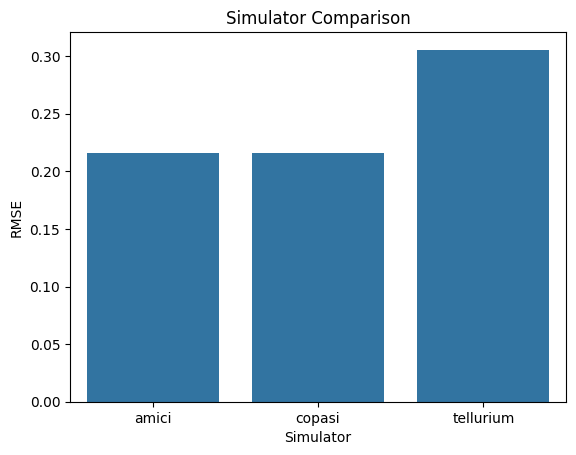

<Axes: title={'center': 'Simulator Comparison'}, xlabel='Simulator', ylabel='RMSE'>

In [13]:
# visualize multiple aspects of the verification result including: observables data, mean square error for each observable (for each simulator)... 
    # ...or in this case, RMSE results for each simulator accross all observables

verifier.visualize_rmse(verification_result)